In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from ND_path_finder.src.data_generators.perlin_generator import PerlinNoiseGenerator
from ND_path_finder.src.data_samplers.random_sampler import sample_xarray

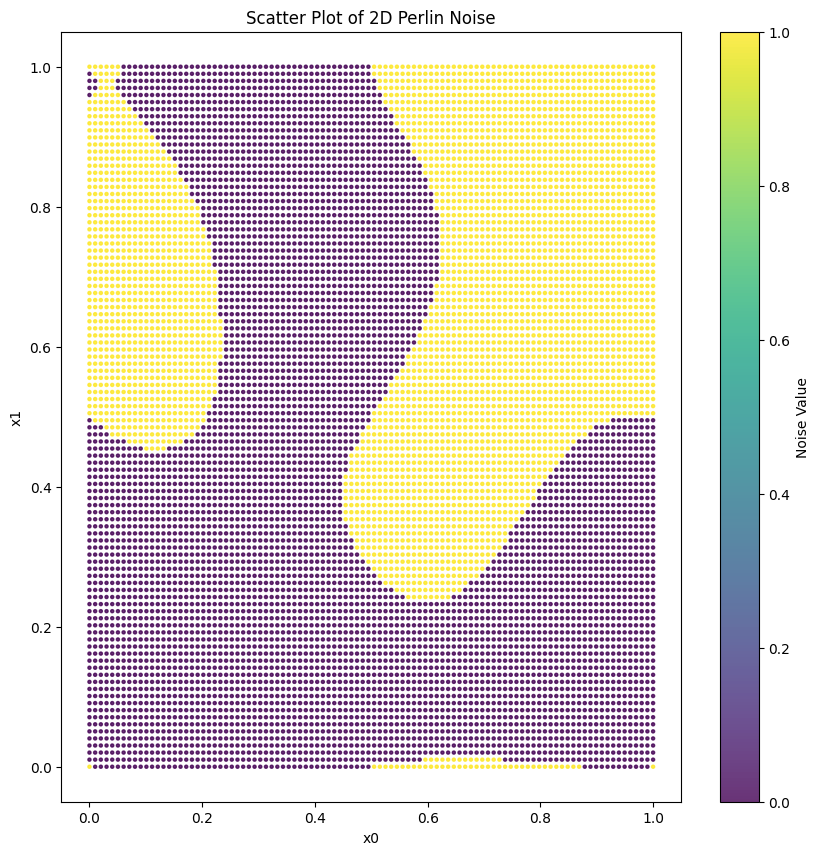

In [19]:
# Initialize the generator with 2D resolution
generator = PerlinNoiseGenerator(res=[100, 100], octv=2, seed=47, time_test=False)

# Generate Perlin noise data
xdataset = generator.perlin_data_xarray()
xdataset

generator.plot_2D_xarray()

In [20]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


def svm_boundary_from_xarray(dataset):
    """
    Fits an SVM model to the data in the xarray.Dataset and plots the decision boundary.

    Parameters:
    - dataset (xarray.Dataset): The input dataset containing 'points' and 'noise_values'.

    Returns:
    - None: Plots the SVM decision boundary and data points.
    """

    # Ensure the required variables are present
    if not {'points', 'noise_values'}.issubset(dataset.variables):
        raise ValueError("Dataset must contain 'points' and 'noise_values' variables.")

    # Extract features and labels
    X = dataset['points'].values  # Shape (num_points, dim)
    y = dataset['noise_values'].values  # Shape (num_points,)


    # Define the parameter grid for grid search
    param_grid = {
        'C': [0.01, 0.1, 1, 5, 10, 100],  # Regularization parameter
        'gamma': [0.001, 0.1, 0.5, 1, 5, 10, 50, 100]  # Kernel coefficient
    }

    # Ensure 2D data for visualization
    if X.shape[1] != 2:
        raise ValueError("This function supports only 2D data (dim=2).")

    # Perform grid search to find the best parameters
    svc = SVC(kernel='rbf')
    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    # Get the best model
    best_svm = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    # Create a grid for decision boundary visualization
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                            np.linspace(y_min, y_max, 500))

    # Evaluate the decision function
    Z = best_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    # Plot the decision boundary and data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=5)
    plt.contour(xx, yy, Z, levels=[0], linestyles=['-'], colors='k')
    plt.title("SVM Decision Boundary with Tuned Parameters")
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max())
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.show()


In [21]:
# svm_boundary_from_xarray(xdataset)

Best parameters: {'C': 5, 'gamma': 100}


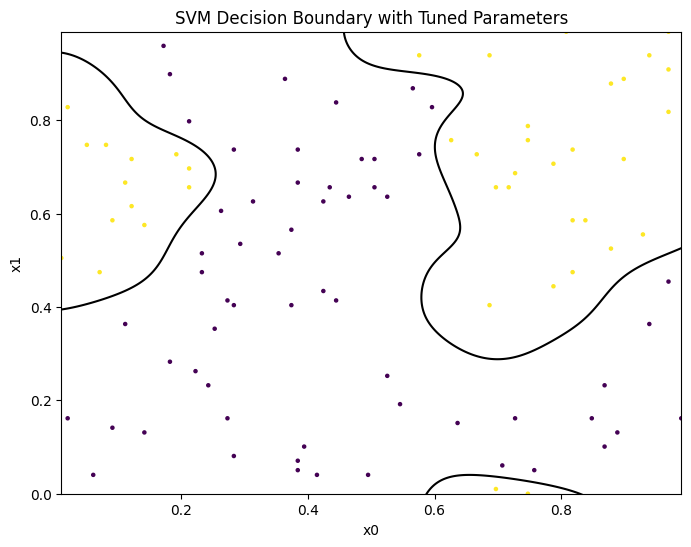

In [22]:
svm_boundary_from_xarray(sample_xarray(xdataset, 100))

Best parameters: {'C': 100, 'gamma': 50}


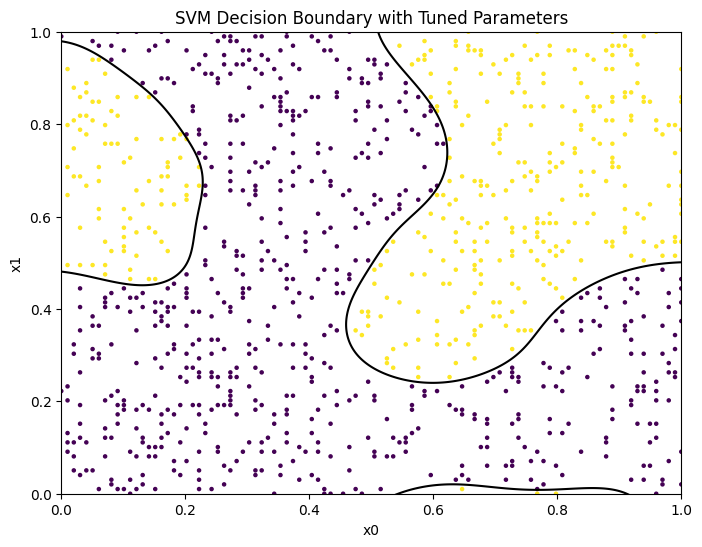

In [23]:
svm_boundary_from_xarray(sample_xarray(xdataset, 1000))